In [1]:
import json 
import pandas as pd
import numpy as np
from pathlib import Path
import PIL
from PIL import Image
import cv2 
import torch
import tqdm
import os

# Created sub directory (10-fold)

In [2]:
import glob

path_root =  '/media/SSD/rheology_data/Glycerol-water-mixtures/'
folder_N = ['10', '20', '30', '40']
files_ = []
flat_files_ = []
## get list of path Directory
for N in folder_N:
    files = glob.glob(f"{path_root}GLY{N}P100/*")
    files_.append(files)
    
#flat list out of a list of lists?
for sublist in files_:
    for item in sublist:
        flat_files_.append(item)
print(len(flat_files_))
flat_files_.sort()
flat_files_

z_ = []
for f in flat_files_:
    z = glob.glob(f"{f}/*-train3line.txt")
    z1 = z[0].split('.')[0]
    z_.append(z1)

## Split for select folder
a_string_ = []
for j in z_:
    a = j.split('-')[:-1]
    a_string = '-'.join(a)
    #print(a_string)
    a_string_.append(a_string)
    
    
a_string_.sort()
print(len(a_string_))
a_string_

10
10


['/media/SSD/rheology_data/Glycerol-water-mixtures/GLY10P100/2/GLY10P100_D0_30HZ_20XINF_UWELL_20220721_124736',
 '/media/SSD/rheology_data/Glycerol-water-mixtures/GLY10P100/4/GLY10P100_D0_30HZ_20XINF_UWELL_20220721_120543',
 '/media/SSD/rheology_data/Glycerol-water-mixtures/GLY10P100/5/GLY10P100_D0_30HZ_20XINF_UWELL_20220721_115755',
 '/media/SSD/rheology_data/Glycerol-water-mixtures/GLY10P100/6/GLY10P100_D0_30HZ_20XINF_UWELL_20220721_115253',
 '/media/SSD/rheology_data/Glycerol-water-mixtures/GLY10P100/7/GLY10P100_D0_30HZ_20XINF_UWELL_20220721_114934',
 '/media/SSD/rheology_data/Glycerol-water-mixtures/GLY20P100/1/GLY20P100_D0_30HZ_20XINF_UWELL_20220801_133214',
 '/media/SSD/rheology_data/Glycerol-water-mixtures/GLY20P100/3/GLY20P100_D0_30HZ_20XINF_UWELL_20220801_134127',
 '/media/SSD/rheology_data/Glycerol-water-mixtures/GLY20P100/4/GLY20P100_D0_30HZ_20XINF_UWELL_20220801_134742',
 '/media/SSD/rheology_data/Glycerol-water-mixtures/GLY30P100/4/GLY30P100_D0_30HZ_20XINF_UWELL_20220721_1

## Create Text file For Triin Set

In [7]:
import glob

#pth2save = '/media/SSD/rheology_ForFLAVR/'

for k in range(len(a_string_)) :
    pth = f'{a_string_[k]}/'
    print(pth)
    txt_name = pth.split('/')[7]
    print(txt_name)
    f_name_toSave = pth.split('/')[:-2]
    f_name_toSave = ('/'.join(f_name_toSave))
    #f_name_toSave = f_name_toSave.replace('/media/SSD/rheology_data', '/media/SSD/rheology_ForFLAVR')
#     if not os.path.exists(f_name_toSave) :
#          os.makedirs(f_name_toSave)
    print(f_name_toSave)
    # relative path to search all text files
    files = glob.glob(f"{pth}*")
    files.sort()
    #print(files)
    print('-'*80)
    df = pd.DataFrame(files, columns =['Path'])
    df_ = df[:-3].reset_index(drop=True)
    print(df_.shape)
    # df2_
    df2 = pd.DataFrame(files, columns =['Path'])
    df2_ = df2[1:-2].reset_index(drop=True)
    print(df2_.shape)
    #df3_ 
    df3 = pd.DataFrame(files, columns =['Path'])
    df3_ = df3[2:-1].reset_index(drop=True)
    print(df3_.shape)
    #df4_ 
    df4 = pd.DataFrame(files, columns =['Path'])
    df4_ = df3[3:].reset_index(drop=True)
    print(df3_.shape)
    #df3_ 
    df_['Path_txt'] = ''
    for i in range(len(df_)):
        name1 = df_['Path'][i]
        name2 = df2_['Path'][i]
        name3 = df3_['Path'][i]
        name4 = df4_['Path'][i]
        df_.loc[df_.index[i], 'Path_txt'] = str(name1)+' '+str(name2)+' '+str(name3)+' '+str(name4)  
    print(df_.shape)
    list_path = df_['Path_txt'].tolist()
    with open(f'{f_name_toSave}/{txt_name}-train4line.txt', 'w') as f:
             for line in list_path:
                 f.write(f"{line}\n")
    print(f'On Process : Write text file name -> [ {f_name_toSave}/{txt_name}-train4line.txt ] ')   

/media/SSD/rheology_data/Glycerol-water-mixtures/GLY10P100/2/GLY10P100_D0_30HZ_20XINF_UWELL_20220721_124736/
GLY10P100_D0_30HZ_20XINF_UWELL_20220721_124736
/media/SSD/rheology_data/Glycerol-water-mixtures/GLY10P100/2
--------------------------------------------------------------------------------
(1998, 1)
(1998, 1)
(1998, 1)
(1998, 1)
(1998, 2)
On Process : Write text file name -> [ /media/SSD/rheology_data/Glycerol-water-mixtures/GLY10P100/2/GLY10P100_D0_30HZ_20XINF_UWELL_20220721_124736-train4line.txt ] 
/media/SSD/rheology_data/Glycerol-water-mixtures/GLY10P100/4/GLY10P100_D0_30HZ_20XINF_UWELL_20220721_120543/
GLY10P100_D0_30HZ_20XINF_UWELL_20220721_120543
/media/SSD/rheology_data/Glycerol-water-mixtures/GLY10P100/4
--------------------------------------------------------------------------------
(1998, 1)
(1998, 1)
(1998, 1)
(1998, 1)
(1998, 2)
On Process : Write text file name -> [ /media/SSD/rheology_data/Glycerol-water-mixtures/GLY10P100/4/GLY10P100_D0_30HZ_20XINF_UWELL_20220721

In [16]:
print(df_['Path'][0])
print('-'*100)
print(df_['Path'][1995])

/media/SSD/rheology_data/Glycerol-water-mixtures/GLY40P100/1/GLY40P100_D0_30HZ_20XINF_UWELL_20220721_135834/GLY40P100_D0_30HZ_20XINF_UWELL_20220721_135834_0000000001.jpg
----------------------------------------------------------------------------------------------------
/media/SSD/rheology_data/Glycerol-water-mixtures/GLY40P100/1/GLY40P100_D0_30HZ_20XINF_UWELL_20220721_135834/GLY40P100_D0_30HZ_20XINF_UWELL_20220721_135834_0000001998.jpg


In [6]:
tolist_txt = df_['Path_txt'].tolist()
for t in tolist_txt:
    print(t)
    print('-'*80)

/media/SSD/rheology_data/Glycerol-water-mixtures/GLY40P100/1/GLY40P100_D0_30HZ_20XINF_UWELL_20220721_135834/GLY40P100_D0_30HZ_20XINF_UWELL_20220721_135834_0000000001.jpg /media/SSD/rheology_data/Glycerol-water-mixtures/GLY40P100/1/GLY40P100_D0_30HZ_20XINF_UWELL_20220721_135834/GLY40P100_D0_30HZ_20XINF_UWELL_20220721_135834_0000000002.jpg /media/SSD/rheology_data/Glycerol-water-mixtures/GLY40P100/1/GLY40P100_D0_30HZ_20XINF_UWELL_20220721_135834/GLY40P100_D0_30HZ_20XINF_UWELL_20220721_135834_0000000003.jpg /media/SSD/rheology_data/Glycerol-water-mixtures/GLY40P100/1/GLY40P100_D0_30HZ_20XINF_UWELL_20220721_135834/GLY40P100_D0_30HZ_20XINF_UWELL_20220721_135834_0000000004.jpg
--------------------------------------------------------------------------------
/media/SSD/rheology_data/Glycerol-water-mixtures/GLY40P100/1/GLY40P100_D0_30HZ_20XINF_UWELL_20220721_135834/GLY40P100_D0_30HZ_20XINF_UWELL_20220721_135834_0000000002.jpg /media/SSD/rheology_data/Glycerol-water-mixtures/GLY40P100/1/GLY40P10

## Chek text files

In [8]:
import glob

test_demo_ = []
for k in range(len(z_)) :
    pth = f'{z_[k]}/'
    txt_name = pth.split('/')[7]
    f_name_toSave = pth.split('/')[:-2]
    f_name_toSave = ('/'.join(f_name_toSave))
    test_demo = glob.glob(f"{f_name_toSave}/*-train4line.txt")
    test_demo_.append(test_demo[0])

print(len(test_demo_))
test_demo_

10


['/media/SSD/rheology_data/Glycerol-water-mixtures/GLY10P100/2/GLY10P100_D0_30HZ_20XINF_UWELL_20220721_124736-train4line.txt',
 '/media/SSD/rheology_data/Glycerol-water-mixtures/GLY10P100/4/GLY10P100_D0_30HZ_20XINF_UWELL_20220721_120543-train4line.txt',
 '/media/SSD/rheology_data/Glycerol-water-mixtures/GLY10P100/5/GLY10P100_D0_30HZ_20XINF_UWELL_20220721_115755-train4line.txt',
 '/media/SSD/rheology_data/Glycerol-water-mixtures/GLY10P100/6/GLY10P100_D0_30HZ_20XINF_UWELL_20220721_115253-train4line.txt',
 '/media/SSD/rheology_data/Glycerol-water-mixtures/GLY10P100/7/GLY10P100_D0_30HZ_20XINF_UWELL_20220721_114934-train4line.txt',
 '/media/SSD/rheology_data/Glycerol-water-mixtures/GLY20P100/1/GLY20P100_D0_30HZ_20XINF_UWELL_20220801_133214-train4line.txt',
 '/media/SSD/rheology_data/Glycerol-water-mixtures/GLY20P100/3/GLY20P100_D0_30HZ_20XINF_UWELL_20220801_134127-train4line.txt',
 '/media/SSD/rheology_data/Glycerol-water-mixtures/GLY20P100/4/GLY20P100_D0_30HZ_20XINF_UWELL_20220801_134742-t

In [13]:
sequence_list_ = []
for i in range(len(test_demo_)):
    #print(test_demo_[i])
    with open(test_demo_[i], 'r') as txt:
        sequence_list = [line.strip() for line in txt]
    #print(len(sequence_list))
    sequence_list_.append(len(sequence_list))
print(len(sequence_list_))
print(f'All Dataset : {sum(sequence_list_)}')
sequence_list_

10
All Dataset : 19978


[1998, 1998, 1998, 1998, 1998, 1998, 1998, 1998, 1998, 1996]

In [17]:
f = open(test_demo_[5], "r")
print(f.readline())

/media/SSD/rheology_data/Glycerol-water-mixtures/GLY20P100/1/GLY20P100_D0_30HZ_20XINF_UWELL_20220801_133214/GLY20P100_D0_30HZ_20XINF_UWELL_20220801_133214_0000000001.jpg /media/SSD/rheology_data/Glycerol-water-mixtures/GLY20P100/1/GLY20P100_D0_30HZ_20XINF_UWELL_20220801_133214/GLY20P100_D0_30HZ_20XINF_UWELL_20220801_133214_0000000002.jpg /media/SSD/rheology_data/Glycerol-water-mixtures/GLY20P100/1/GLY20P100_D0_30HZ_20XINF_UWELL_20220801_133214/GLY20P100_D0_30HZ_20XINF_UWELL_20220801_133214_0000000003.jpg /media/SSD/rheology_data/Glycerol-water-mixtures/GLY20P100/1/GLY20P100_D0_30HZ_20XINF_UWELL_20220801_133214/GLY20P100_D0_30HZ_20XINF_UWELL_20220801_133214_0000000004.jpg



In [18]:
f = open(test_demo_[5], "r")
print(f.read())

/media/SSD/rheology_data/Glycerol-water-mixtures/GLY20P100/1/GLY20P100_D0_30HZ_20XINF_UWELL_20220801_133214/GLY20P100_D0_30HZ_20XINF_UWELL_20220801_133214_0000000001.jpg /media/SSD/rheology_data/Glycerol-water-mixtures/GLY20P100/1/GLY20P100_D0_30HZ_20XINF_UWELL_20220801_133214/GLY20P100_D0_30HZ_20XINF_UWELL_20220801_133214_0000000002.jpg /media/SSD/rheology_data/Glycerol-water-mixtures/GLY20P100/1/GLY20P100_D0_30HZ_20XINF_UWELL_20220801_133214/GLY20P100_D0_30HZ_20XINF_UWELL_20220801_133214_0000000003.jpg /media/SSD/rheology_data/Glycerol-water-mixtures/GLY20P100/1/GLY20P100_D0_30HZ_20XINF_UWELL_20220801_133214/GLY20P100_D0_30HZ_20XINF_UWELL_20220801_133214_0000000004.jpg
/media/SSD/rheology_data/Glycerol-water-mixtures/GLY20P100/1/GLY20P100_D0_30HZ_20XINF_UWELL_20220801_133214/GLY20P100_D0_30HZ_20XINF_UWELL_20220801_133214_0000000002.jpg /media/SSD/rheology_data/Glycerol-water-mixtures/GLY20P100/1/GLY20P100_D0_30HZ_20XINF_UWELL_20220801_133214/GLY20P100_D0_30HZ_20XINF_UWELL_20220801_13

# 👻 Created sub directory (10-fold)

New Diractory :

``/media/SSD/rheology_ForFLAVR``

In [20]:
#pth = args.data_root
text_demo_ = []
for f in flat_files_:
    test_demo = glob.glob(f"{f}/*-train4line.txt")
    test_demo = test_demo[0]
    text_demo_.append(test_demo)

print(len(text_demo_))
text_demo_

10


['/media/SSD/rheology_data/Glycerol-water-mixtures/GLY10P100/2/GLY10P100_D0_30HZ_20XINF_UWELL_20220721_124736-train4line.txt',
 '/media/SSD/rheology_data/Glycerol-water-mixtures/GLY10P100/4/GLY10P100_D0_30HZ_20XINF_UWELL_20220721_120543-train4line.txt',
 '/media/SSD/rheology_data/Glycerol-water-mixtures/GLY10P100/5/GLY10P100_D0_30HZ_20XINF_UWELL_20220721_115755-train4line.txt',
 '/media/SSD/rheology_data/Glycerol-water-mixtures/GLY10P100/6/GLY10P100_D0_30HZ_20XINF_UWELL_20220721_115253-train4line.txt',
 '/media/SSD/rheology_data/Glycerol-water-mixtures/GLY10P100/7/GLY10P100_D0_30HZ_20XINF_UWELL_20220721_114934-train4line.txt',
 '/media/SSD/rheology_data/Glycerol-water-mixtures/GLY20P100/1/GLY20P100_D0_30HZ_20XINF_UWELL_20220801_133214-train4line.txt',
 '/media/SSD/rheology_data/Glycerol-water-mixtures/GLY20P100/3/GLY20P100_D0_30HZ_20XINF_UWELL_20220801_134127-train4line.txt',
 '/media/SSD/rheology_data/Glycerol-water-mixtures/GLY20P100/4/GLY20P100_D0_30HZ_20XINF_UWELL_20220801_134742-t

In [27]:
import shutil as sh

flod_Name_ = [] 
new_dir = '/media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/' 
for j in range(len(text_demo_)):
    with open(text_demo_[j], 'r') as txt:
         sequence_list = [line.strip() for line in txt]
    flod_Name = text_demo_[j].split('/')
    flod_Name = flod_Name[5:7]
    flod_Name = ('-'.join(flod_Name))
    #print(flod_Name)
    #for seq in sequence_list:
    for i in range(len(sequence_list)):
        img0_path, img1_path, img2_path, img3_path = sequence_list[i].split(' ')
        if not os.path.exists('{}{}-fold{}/{}'.format(new_dir, flod_Name,j+1, i+1)) :
             os.makedirs('{}{}-fold{}/{}'.format(new_dir, flod_Name, j+1, i+1))
        sh.copy("{}".format(img0_path),"{}{}-fold{}/{}/im1.png".format(new_dir, flod_Name, j+1, i+1))
        sh.copy("{}".format(img1_path),"{}{}-fold{}/{}/im2.png".format(new_dir, flod_Name, j+1, i+1))
        sh.copy("{}".format(img2_path),"{}{}-fold{}/{}/im3.png".format(new_dir, flod_Name, j+1, i+1))
        sh.copy("{}".format(img3_path),"{}{}-fold{}/{}/im4.png".format(new_dir, flod_Name, j+1, i+1))
        print(f'On process Create Folder --> [ {new_dir}{flod_Name}-fold{j+1}/{i+1} ]')
        flod_Name_.append(f'{flod_Name}-fold{j+1}/{i+1}')

On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY10P100-2-fold1/1 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY10P100-2-fold1/2 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY10P100-2-fold1/3 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY10P100-2-fold1/4 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY10P100-2-fold1/5 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY10P100-2-fold1/6 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY10P100-2-fold1/7 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY10P100-2-fold1/8 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY10P100-2-fo

On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY10P100-2-fold1/103 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY10P100-2-fold1/104 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY10P100-2-fold1/105 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY10P100-2-fold1/106 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY10P100-2-fold1/107 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY10P100-2-fold1/108 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY10P100-2-fold1/109 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY10P100-2-fold1/110 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-trai

On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY10P100-2-fold1/220 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY10P100-2-fold1/221 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY10P100-2-fold1/222 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY10P100-2-fold1/223 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY10P100-2-fold1/224 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY10P100-2-fold1/225 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY10P100-2-fold1/226 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY10P100-2-fold1/227 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-trai

On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY10P100-2-fold1/332 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY10P100-2-fold1/333 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY10P100-2-fold1/334 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY10P100-2-fold1/335 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY10P100-2-fold1/336 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY10P100-2-fold1/337 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY10P100-2-fold1/338 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY10P100-2-fold1/339 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-trai

On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY10P100-2-fold1/446 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY10P100-2-fold1/447 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY10P100-2-fold1/448 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY10P100-2-fold1/449 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY10P100-2-fold1/450 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY10P100-2-fold1/451 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY10P100-2-fold1/452 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY10P100-2-fold1/453 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-trai

On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY10P100-2-fold1/564 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY10P100-2-fold1/565 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY10P100-2-fold1/566 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY10P100-2-fold1/567 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY10P100-2-fold1/568 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY10P100-2-fold1/569 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY10P100-2-fold1/570 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY10P100-2-fold1/571 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-trai

On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY10P100-2-fold1/674 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY10P100-2-fold1/675 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY10P100-2-fold1/676 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY10P100-2-fold1/677 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY10P100-2-fold1/678 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY10P100-2-fold1/679 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY10P100-2-fold1/680 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY10P100-2-fold1/681 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-trai

On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY10P100-2-fold1/789 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY10P100-2-fold1/790 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY10P100-2-fold1/791 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY10P100-2-fold1/792 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY10P100-2-fold1/793 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY10P100-2-fold1/794 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY10P100-2-fold1/795 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY10P100-2-fold1/796 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-trai

On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY10P100-2-fold1/899 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY10P100-2-fold1/900 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY10P100-2-fold1/901 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY10P100-2-fold1/902 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY10P100-2-fold1/903 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY10P100-2-fold1/904 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY10P100-2-fold1/905 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY10P100-2-fold1/906 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-trai

On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY10P100-2-fold1/1013 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY10P100-2-fold1/1014 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY10P100-2-fold1/1015 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY10P100-2-fold1/1016 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY10P100-2-fold1/1017 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY10P100-2-fold1/1018 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY10P100-2-fold1/1019 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY10P100-2-fold1/1020 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtu

On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY10P100-2-fold1/1128 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY10P100-2-fold1/1129 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY10P100-2-fold1/1130 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY10P100-2-fold1/1131 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY10P100-2-fold1/1132 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY10P100-2-fold1/1133 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY10P100-2-fold1/1134 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY10P100-2-fold1/1135 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtu

On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY10P100-2-fold1/1239 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY10P100-2-fold1/1240 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY10P100-2-fold1/1241 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY10P100-2-fold1/1242 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY10P100-2-fold1/1243 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY10P100-2-fold1/1244 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY10P100-2-fold1/1245 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY10P100-2-fold1/1246 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtu

On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY10P100-2-fold1/1355 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY10P100-2-fold1/1356 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY10P100-2-fold1/1357 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY10P100-2-fold1/1358 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY10P100-2-fold1/1359 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY10P100-2-fold1/1360 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY10P100-2-fold1/1361 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY10P100-2-fold1/1362 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtu

On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY10P100-2-fold1/1462 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY10P100-2-fold1/1463 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY10P100-2-fold1/1464 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY10P100-2-fold1/1465 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY10P100-2-fold1/1466 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY10P100-2-fold1/1467 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY10P100-2-fold1/1468 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY10P100-2-fold1/1469 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtu

On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY10P100-2-fold1/1576 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY10P100-2-fold1/1577 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY10P100-2-fold1/1578 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY10P100-2-fold1/1579 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY10P100-2-fold1/1580 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY10P100-2-fold1/1581 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY10P100-2-fold1/1582 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY10P100-2-fold1/1583 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtu

On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY10P100-2-fold1/1685 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY10P100-2-fold1/1686 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY10P100-2-fold1/1687 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY10P100-2-fold1/1688 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY10P100-2-fold1/1689 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY10P100-2-fold1/1690 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY10P100-2-fold1/1691 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY10P100-2-fold1/1692 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtu

On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY10P100-2-fold1/1802 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY10P100-2-fold1/1803 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY10P100-2-fold1/1804 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY10P100-2-fold1/1805 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY10P100-2-fold1/1806 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY10P100-2-fold1/1807 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY10P100-2-fold1/1808 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY10P100-2-fold1/1809 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtu

On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY10P100-2-fold1/1912 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY10P100-2-fold1/1913 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY10P100-2-fold1/1914 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY10P100-2-fold1/1915 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY10P100-2-fold1/1916 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY10P100-2-fold1/1917 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY10P100-2-fold1/1918 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY10P100-2-fold1/1919 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtu

On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY10P100-4-fold2/29 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY10P100-4-fold2/30 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY10P100-4-fold2/31 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY10P100-4-fold2/32 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY10P100-4-fold2/33 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY10P100-4-fold2/34 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY10P100-4-fold2/35 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY10P100-4-fold2/36 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY10P

On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY10P100-4-fold2/141 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY10P100-4-fold2/142 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY10P100-4-fold2/143 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY10P100-4-fold2/144 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY10P100-4-fold2/145 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY10P100-4-fold2/146 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY10P100-4-fold2/147 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY10P100-4-fold2/148 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-trai

On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY10P100-4-fold2/259 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY10P100-4-fold2/260 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY10P100-4-fold2/261 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY10P100-4-fold2/262 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY10P100-4-fold2/263 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY10P100-4-fold2/264 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY10P100-4-fold2/265 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY10P100-4-fold2/266 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-trai

On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY10P100-4-fold2/376 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY10P100-4-fold2/377 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY10P100-4-fold2/378 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY10P100-4-fold2/379 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY10P100-4-fold2/380 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY10P100-4-fold2/381 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY10P100-4-fold2/382 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY10P100-4-fold2/383 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-trai

On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY10P100-4-fold2/488 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY10P100-4-fold2/489 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY10P100-4-fold2/490 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY10P100-4-fold2/491 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY10P100-4-fold2/492 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY10P100-4-fold2/493 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY10P100-4-fold2/494 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY10P100-4-fold2/495 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-trai

On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY10P100-4-fold2/599 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY10P100-4-fold2/600 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY10P100-4-fold2/601 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY10P100-4-fold2/602 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY10P100-4-fold2/603 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY10P100-4-fold2/604 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY10P100-4-fold2/605 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY10P100-4-fold2/606 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-trai

On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY10P100-4-fold2/707 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY10P100-4-fold2/708 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY10P100-4-fold2/709 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY10P100-4-fold2/710 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY10P100-4-fold2/711 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY10P100-4-fold2/712 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY10P100-4-fold2/713 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY10P100-4-fold2/714 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-trai

On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY10P100-4-fold2/819 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY10P100-4-fold2/820 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY10P100-4-fold2/821 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY10P100-4-fold2/822 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY10P100-4-fold2/823 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY10P100-4-fold2/824 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY10P100-4-fold2/825 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY10P100-4-fold2/826 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-trai

On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY10P100-4-fold2/927 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY10P100-4-fold2/928 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY10P100-4-fold2/929 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY10P100-4-fold2/930 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY10P100-4-fold2/931 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY10P100-4-fold2/932 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY10P100-4-fold2/933 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY10P100-4-fold2/934 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-trai

On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY10P100-4-fold2/1047 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY10P100-4-fold2/1048 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY10P100-4-fold2/1049 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY10P100-4-fold2/1050 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY10P100-4-fold2/1051 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY10P100-4-fold2/1052 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY10P100-4-fold2/1053 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY10P100-4-fold2/1054 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtu

On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY10P100-4-fold2/1158 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY10P100-4-fold2/1159 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY10P100-4-fold2/1160 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY10P100-4-fold2/1161 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY10P100-4-fold2/1162 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY10P100-4-fold2/1163 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY10P100-4-fold2/1164 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY10P100-4-fold2/1165 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtu

On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY10P100-4-fold2/1284 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY10P100-4-fold2/1285 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY10P100-4-fold2/1286 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY10P100-4-fold2/1287 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY10P100-4-fold2/1288 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY10P100-4-fold2/1289 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY10P100-4-fold2/1290 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY10P100-4-fold2/1291 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtu

On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY10P100-4-fold2/1399 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY10P100-4-fold2/1400 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY10P100-4-fold2/1401 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY10P100-4-fold2/1402 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY10P100-4-fold2/1403 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY10P100-4-fold2/1404 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY10P100-4-fold2/1405 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY10P100-4-fold2/1406 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtu

On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY10P100-4-fold2/1518 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY10P100-4-fold2/1519 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY10P100-4-fold2/1520 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY10P100-4-fold2/1521 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY10P100-4-fold2/1522 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY10P100-4-fold2/1523 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY10P100-4-fold2/1524 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY10P100-4-fold2/1525 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtu

On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY10P100-4-fold2/1642 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY10P100-4-fold2/1643 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY10P100-4-fold2/1644 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY10P100-4-fold2/1645 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY10P100-4-fold2/1646 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY10P100-4-fold2/1647 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY10P100-4-fold2/1648 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY10P100-4-fold2/1649 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtu

On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY10P100-4-fold2/1755 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY10P100-4-fold2/1756 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY10P100-4-fold2/1757 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY10P100-4-fold2/1758 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY10P100-4-fold2/1759 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY10P100-4-fold2/1760 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY10P100-4-fold2/1761 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY10P100-4-fold2/1762 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtu

On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY10P100-4-fold2/1871 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY10P100-4-fold2/1872 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY10P100-4-fold2/1873 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY10P100-4-fold2/1874 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY10P100-4-fold2/1875 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY10P100-4-fold2/1876 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY10P100-4-fold2/1877 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY10P100-4-fold2/1878 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtu

On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY10P100-4-fold2/1987 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY10P100-4-fold2/1988 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY10P100-4-fold2/1989 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY10P100-4-fold2/1990 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY10P100-4-fold2/1991 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY10P100-4-fold2/1992 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY10P100-4-fold2/1993 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY10P100-4-fold2/1994 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtu

On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY10P100-5-fold3/106 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY10P100-5-fold3/107 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY10P100-5-fold3/108 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY10P100-5-fold3/109 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY10P100-5-fold3/110 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY10P100-5-fold3/111 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY10P100-5-fold3/112 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY10P100-5-fold3/113 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-trai

On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY10P100-5-fold3/225 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY10P100-5-fold3/226 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY10P100-5-fold3/227 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY10P100-5-fold3/228 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY10P100-5-fold3/229 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY10P100-5-fold3/230 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY10P100-5-fold3/231 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY10P100-5-fold3/232 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-trai

On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY10P100-5-fold3/338 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY10P100-5-fold3/339 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY10P100-5-fold3/340 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY10P100-5-fold3/341 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY10P100-5-fold3/342 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY10P100-5-fold3/343 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY10P100-5-fold3/344 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY10P100-5-fold3/345 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-trai

On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY10P100-5-fold3/453 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY10P100-5-fold3/454 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY10P100-5-fold3/455 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY10P100-5-fold3/456 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY10P100-5-fold3/457 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY10P100-5-fold3/458 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY10P100-5-fold3/459 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY10P100-5-fold3/460 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-trai

On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY10P100-5-fold3/563 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY10P100-5-fold3/564 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY10P100-5-fold3/565 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY10P100-5-fold3/566 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY10P100-5-fold3/567 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY10P100-5-fold3/568 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY10P100-5-fold3/569 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY10P100-5-fold3/570 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-trai

On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY10P100-5-fold3/679 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY10P100-5-fold3/680 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY10P100-5-fold3/681 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY10P100-5-fold3/682 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY10P100-5-fold3/683 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY10P100-5-fold3/684 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY10P100-5-fold3/685 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY10P100-5-fold3/686 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-trai

On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY10P100-5-fold3/800 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY10P100-5-fold3/801 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY10P100-5-fold3/802 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY10P100-5-fold3/803 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY10P100-5-fold3/804 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY10P100-5-fold3/805 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY10P100-5-fold3/806 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY10P100-5-fold3/807 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-trai

On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY10P100-5-fold3/920 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY10P100-5-fold3/921 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY10P100-5-fold3/922 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY10P100-5-fold3/923 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY10P100-5-fold3/924 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY10P100-5-fold3/925 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY10P100-5-fold3/926 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY10P100-5-fold3/927 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-trai

On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY10P100-5-fold3/1038 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY10P100-5-fold3/1039 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY10P100-5-fold3/1040 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY10P100-5-fold3/1041 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY10P100-5-fold3/1042 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY10P100-5-fold3/1043 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY10P100-5-fold3/1044 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY10P100-5-fold3/1045 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtu

On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY10P100-5-fold3/1148 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY10P100-5-fold3/1149 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY10P100-5-fold3/1150 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY10P100-5-fold3/1151 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY10P100-5-fold3/1152 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY10P100-5-fold3/1153 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY10P100-5-fold3/1154 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY10P100-5-fold3/1155 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtu

On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY10P100-5-fold3/1269 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY10P100-5-fold3/1270 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY10P100-5-fold3/1271 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY10P100-5-fold3/1272 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY10P100-5-fold3/1273 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY10P100-5-fold3/1274 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY10P100-5-fold3/1275 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY10P100-5-fold3/1276 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtu

On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY10P100-5-fold3/1378 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY10P100-5-fold3/1379 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY10P100-5-fold3/1380 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY10P100-5-fold3/1381 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY10P100-5-fold3/1382 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY10P100-5-fold3/1383 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY10P100-5-fold3/1384 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY10P100-5-fold3/1385 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtu

On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY10P100-5-fold3/1497 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY10P100-5-fold3/1498 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY10P100-5-fold3/1499 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY10P100-5-fold3/1500 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY10P100-5-fold3/1501 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY10P100-5-fold3/1502 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY10P100-5-fold3/1503 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY10P100-5-fold3/1504 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtu

On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY10P100-5-fold3/1610 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY10P100-5-fold3/1611 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY10P100-5-fold3/1612 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY10P100-5-fold3/1613 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY10P100-5-fold3/1614 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY10P100-5-fold3/1615 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY10P100-5-fold3/1616 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY10P100-5-fold3/1617 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtu

On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY10P100-5-fold3/1727 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY10P100-5-fold3/1728 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY10P100-5-fold3/1729 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY10P100-5-fold3/1730 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY10P100-5-fold3/1731 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY10P100-5-fold3/1732 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY10P100-5-fold3/1733 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY10P100-5-fold3/1734 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtu

On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY10P100-5-fold3/1822 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY10P100-5-fold3/1823 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY10P100-5-fold3/1824 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY10P100-5-fold3/1825 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY10P100-5-fold3/1826 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY10P100-5-fold3/1827 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY10P100-5-fold3/1828 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY10P100-5-fold3/1829 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtu

On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY10P100-5-fold3/1896 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY10P100-5-fold3/1897 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY10P100-5-fold3/1898 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY10P100-5-fold3/1899 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY10P100-5-fold3/1900 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY10P100-5-fold3/1901 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY10P100-5-fold3/1902 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY10P100-5-fold3/1903 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtu

On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY10P100-6-fold4/53 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY10P100-6-fold4/54 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY10P100-6-fold4/55 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY10P100-6-fold4/56 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY10P100-6-fold4/57 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY10P100-6-fold4/58 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY10P100-6-fold4/59 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY10P100-6-fold4/60 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY10P

On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY10P100-6-fold4/161 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY10P100-6-fold4/162 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY10P100-6-fold4/163 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY10P100-6-fold4/164 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY10P100-6-fold4/165 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY10P100-6-fold4/166 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY10P100-6-fold4/167 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY10P100-6-fold4/168 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-trai

On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY10P100-6-fold4/272 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY10P100-6-fold4/273 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY10P100-6-fold4/274 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY10P100-6-fold4/275 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY10P100-6-fold4/276 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY10P100-6-fold4/277 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY10P100-6-fold4/278 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY10P100-6-fold4/279 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-trai

On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY10P100-6-fold4/374 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY10P100-6-fold4/375 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY10P100-6-fold4/376 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY10P100-6-fold4/377 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY10P100-6-fold4/378 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY10P100-6-fold4/379 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY10P100-6-fold4/380 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY10P100-6-fold4/381 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-trai

On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY10P100-6-fold4/478 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY10P100-6-fold4/479 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY10P100-6-fold4/480 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY10P100-6-fold4/481 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY10P100-6-fold4/482 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY10P100-6-fold4/483 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY10P100-6-fold4/484 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY10P100-6-fold4/485 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-trai

On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY10P100-6-fold4/584 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY10P100-6-fold4/585 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY10P100-6-fold4/586 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY10P100-6-fold4/587 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY10P100-6-fold4/588 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY10P100-6-fold4/589 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY10P100-6-fold4/590 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY10P100-6-fold4/591 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-trai

On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY10P100-6-fold4/690 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY10P100-6-fold4/691 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY10P100-6-fold4/692 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY10P100-6-fold4/693 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY10P100-6-fold4/694 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY10P100-6-fold4/695 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY10P100-6-fold4/696 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY10P100-6-fold4/697 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-trai

On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY10P100-6-fold4/795 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY10P100-6-fold4/796 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY10P100-6-fold4/797 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY10P100-6-fold4/798 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY10P100-6-fold4/799 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY10P100-6-fold4/800 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY10P100-6-fold4/801 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY10P100-6-fold4/802 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-trai

On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY10P100-6-fold4/898 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY10P100-6-fold4/899 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY10P100-6-fold4/900 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY10P100-6-fold4/901 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY10P100-6-fold4/902 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY10P100-6-fold4/903 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY10P100-6-fold4/904 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY10P100-6-fold4/905 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-trai

On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY10P100-6-fold4/1005 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY10P100-6-fold4/1006 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY10P100-6-fold4/1007 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY10P100-6-fold4/1008 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY10P100-6-fold4/1009 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY10P100-6-fold4/1010 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY10P100-6-fold4/1011 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY10P100-6-fold4/1012 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtu

On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY10P100-6-fold4/1131 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY10P100-6-fold4/1132 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY10P100-6-fold4/1133 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY10P100-6-fold4/1134 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY10P100-6-fold4/1135 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY10P100-6-fold4/1136 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY10P100-6-fold4/1137 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY10P100-6-fold4/1138 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtu

On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY10P100-6-fold4/1278 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY10P100-6-fold4/1279 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY10P100-6-fold4/1280 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY10P100-6-fold4/1281 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY10P100-6-fold4/1282 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY10P100-6-fold4/1283 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY10P100-6-fold4/1284 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY10P100-6-fold4/1285 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtu

On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY10P100-6-fold4/1414 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY10P100-6-fold4/1415 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY10P100-6-fold4/1416 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY10P100-6-fold4/1417 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY10P100-6-fold4/1418 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY10P100-6-fold4/1419 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY10P100-6-fold4/1420 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY10P100-6-fold4/1421 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtu

On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY10P100-6-fold4/1554 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY10P100-6-fold4/1555 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY10P100-6-fold4/1556 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY10P100-6-fold4/1557 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY10P100-6-fold4/1558 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY10P100-6-fold4/1559 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY10P100-6-fold4/1560 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY10P100-6-fold4/1561 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtu

On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY10P100-6-fold4/1680 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY10P100-6-fold4/1681 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY10P100-6-fold4/1682 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY10P100-6-fold4/1683 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY10P100-6-fold4/1684 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY10P100-6-fold4/1685 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY10P100-6-fold4/1686 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY10P100-6-fold4/1687 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtu

On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY10P100-6-fold4/1803 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY10P100-6-fold4/1804 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY10P100-6-fold4/1805 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY10P100-6-fold4/1806 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY10P100-6-fold4/1807 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY10P100-6-fold4/1808 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY10P100-6-fold4/1809 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY10P100-6-fold4/1810 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtu

On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY10P100-6-fold4/1920 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY10P100-6-fold4/1921 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY10P100-6-fold4/1922 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY10P100-6-fold4/1923 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY10P100-6-fold4/1924 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY10P100-6-fold4/1925 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY10P100-6-fold4/1926 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY10P100-6-fold4/1927 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtu

On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY10P100-7-fold5/39 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY10P100-7-fold5/40 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY10P100-7-fold5/41 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY10P100-7-fold5/42 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY10P100-7-fold5/43 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY10P100-7-fold5/44 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY10P100-7-fold5/45 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY10P100-7-fold5/46 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY10P

On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY10P100-7-fold5/156 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY10P100-7-fold5/157 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY10P100-7-fold5/158 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY10P100-7-fold5/159 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY10P100-7-fold5/160 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY10P100-7-fold5/161 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY10P100-7-fold5/162 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY10P100-7-fold5/163 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-trai

On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY10P100-7-fold5/241 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY10P100-7-fold5/242 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY10P100-7-fold5/243 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY10P100-7-fold5/244 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY10P100-7-fold5/245 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY10P100-7-fold5/246 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY10P100-7-fold5/247 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY10P100-7-fold5/248 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-trai

On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY10P100-7-fold5/382 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY10P100-7-fold5/383 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY10P100-7-fold5/384 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY10P100-7-fold5/385 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY10P100-7-fold5/386 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY10P100-7-fold5/387 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY10P100-7-fold5/388 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY10P100-7-fold5/389 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-trai

On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY10P100-7-fold5/471 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY10P100-7-fold5/472 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY10P100-7-fold5/473 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY10P100-7-fold5/474 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY10P100-7-fold5/475 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY10P100-7-fold5/476 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY10P100-7-fold5/477 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY10P100-7-fold5/478 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-trai

On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY10P100-7-fold5/549 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY10P100-7-fold5/550 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY10P100-7-fold5/551 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY10P100-7-fold5/552 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY10P100-7-fold5/553 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY10P100-7-fold5/554 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY10P100-7-fold5/555 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY10P100-7-fold5/556 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-trai

On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY10P100-7-fold5/638 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY10P100-7-fold5/639 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY10P100-7-fold5/640 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY10P100-7-fold5/641 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY10P100-7-fold5/642 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY10P100-7-fold5/643 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY10P100-7-fold5/644 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY10P100-7-fold5/645 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-trai

On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY10P100-7-fold5/735 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY10P100-7-fold5/736 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY10P100-7-fold5/737 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY10P100-7-fold5/738 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY10P100-7-fold5/739 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY10P100-7-fold5/740 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY10P100-7-fold5/741 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY10P100-7-fold5/742 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-trai

On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY10P100-7-fold5/821 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY10P100-7-fold5/822 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY10P100-7-fold5/823 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY10P100-7-fold5/824 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY10P100-7-fold5/825 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY10P100-7-fold5/826 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY10P100-7-fold5/827 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY10P100-7-fold5/828 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-trai

On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY10P100-7-fold5/935 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY10P100-7-fold5/936 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY10P100-7-fold5/937 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY10P100-7-fold5/938 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY10P100-7-fold5/939 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY10P100-7-fold5/940 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY10P100-7-fold5/941 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY10P100-7-fold5/942 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-trai

On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY10P100-7-fold5/1057 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY10P100-7-fold5/1058 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY10P100-7-fold5/1059 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY10P100-7-fold5/1060 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY10P100-7-fold5/1061 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY10P100-7-fold5/1062 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY10P100-7-fold5/1063 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY10P100-7-fold5/1064 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtu

On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY10P100-7-fold5/1177 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY10P100-7-fold5/1178 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY10P100-7-fold5/1179 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY10P100-7-fold5/1180 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY10P100-7-fold5/1181 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY10P100-7-fold5/1182 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY10P100-7-fold5/1183 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY10P100-7-fold5/1184 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtu

On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY10P100-7-fold5/1301 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY10P100-7-fold5/1302 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY10P100-7-fold5/1303 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY10P100-7-fold5/1304 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY10P100-7-fold5/1305 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY10P100-7-fold5/1306 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY10P100-7-fold5/1307 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY10P100-7-fold5/1308 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtu

On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY10P100-7-fold5/1429 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY10P100-7-fold5/1430 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY10P100-7-fold5/1431 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY10P100-7-fold5/1432 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY10P100-7-fold5/1433 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY10P100-7-fold5/1434 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY10P100-7-fold5/1435 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY10P100-7-fold5/1436 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtu

On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY10P100-7-fold5/1522 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY10P100-7-fold5/1523 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY10P100-7-fold5/1524 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY10P100-7-fold5/1525 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY10P100-7-fold5/1526 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY10P100-7-fold5/1527 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY10P100-7-fold5/1528 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY10P100-7-fold5/1529 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtu

On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY10P100-7-fold5/1623 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY10P100-7-fold5/1624 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY10P100-7-fold5/1625 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY10P100-7-fold5/1626 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY10P100-7-fold5/1627 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY10P100-7-fold5/1628 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY10P100-7-fold5/1629 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY10P100-7-fold5/1630 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtu

On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY10P100-7-fold5/1743 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY10P100-7-fold5/1744 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY10P100-7-fold5/1745 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY10P100-7-fold5/1746 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY10P100-7-fold5/1747 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY10P100-7-fold5/1748 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY10P100-7-fold5/1749 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY10P100-7-fold5/1750 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtu

On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY10P100-7-fold5/1854 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY10P100-7-fold5/1855 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY10P100-7-fold5/1856 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY10P100-7-fold5/1857 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY10P100-7-fold5/1858 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY10P100-7-fold5/1859 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY10P100-7-fold5/1860 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY10P100-7-fold5/1861 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtu

On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY10P100-7-fold5/1970 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY10P100-7-fold5/1971 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY10P100-7-fold5/1972 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY10P100-7-fold5/1973 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY10P100-7-fold5/1974 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY10P100-7-fold5/1975 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY10P100-7-fold5/1976 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY10P100-7-fold5/1977 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtu

On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY20P100-1-fold6/85 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY20P100-1-fold6/86 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY20P100-1-fold6/87 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY20P100-1-fold6/88 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY20P100-1-fold6/89 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY20P100-1-fold6/90 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY20P100-1-fold6/91 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY20P100-1-fold6/92 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY20P

On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY20P100-1-fold6/169 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY20P100-1-fold6/170 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY20P100-1-fold6/171 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY20P100-1-fold6/172 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY20P100-1-fold6/173 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY20P100-1-fold6/174 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY20P100-1-fold6/175 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY20P100-1-fold6/176 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-trai

On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY20P100-1-fold6/295 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY20P100-1-fold6/296 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY20P100-1-fold6/297 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY20P100-1-fold6/298 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY20P100-1-fold6/299 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY20P100-1-fold6/300 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY20P100-1-fold6/301 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY20P100-1-fold6/302 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-trai

On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY20P100-1-fold6/424 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY20P100-1-fold6/425 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY20P100-1-fold6/426 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY20P100-1-fold6/427 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY20P100-1-fold6/428 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY20P100-1-fold6/429 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY20P100-1-fold6/430 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY20P100-1-fold6/431 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-trai

On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY20P100-1-fold6/551 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY20P100-1-fold6/552 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY20P100-1-fold6/553 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY20P100-1-fold6/554 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY20P100-1-fold6/555 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY20P100-1-fold6/556 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY20P100-1-fold6/557 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY20P100-1-fold6/558 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-trai

On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY20P100-1-fold6/685 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY20P100-1-fold6/686 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY20P100-1-fold6/687 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY20P100-1-fold6/688 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY20P100-1-fold6/689 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY20P100-1-fold6/690 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY20P100-1-fold6/691 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY20P100-1-fold6/692 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-trai

On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY20P100-1-fold6/816 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY20P100-1-fold6/817 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY20P100-1-fold6/818 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY20P100-1-fold6/819 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY20P100-1-fold6/820 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY20P100-1-fold6/821 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY20P100-1-fold6/822 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY20P100-1-fold6/823 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-trai

On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY20P100-1-fold6/958 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY20P100-1-fold6/959 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY20P100-1-fold6/960 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY20P100-1-fold6/961 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY20P100-1-fold6/962 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY20P100-1-fold6/963 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY20P100-1-fold6/964 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY20P100-1-fold6/965 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-trai

On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY20P100-1-fold6/1078 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY20P100-1-fold6/1079 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY20P100-1-fold6/1080 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY20P100-1-fold6/1081 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY20P100-1-fold6/1082 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY20P100-1-fold6/1083 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY20P100-1-fold6/1084 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY20P100-1-fold6/1085 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtu

On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY20P100-1-fold6/1177 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY20P100-1-fold6/1178 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY20P100-1-fold6/1179 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY20P100-1-fold6/1180 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY20P100-1-fold6/1181 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY20P100-1-fold6/1182 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY20P100-1-fold6/1183 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY20P100-1-fold6/1184 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtu

On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY20P100-1-fold6/1278 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY20P100-1-fold6/1279 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY20P100-1-fold6/1280 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY20P100-1-fold6/1281 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY20P100-1-fold6/1282 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY20P100-1-fold6/1283 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY20P100-1-fold6/1284 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY20P100-1-fold6/1285 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtu

On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY20P100-1-fold6/1375 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY20P100-1-fold6/1376 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY20P100-1-fold6/1377 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY20P100-1-fold6/1378 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY20P100-1-fold6/1379 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY20P100-1-fold6/1380 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY20P100-1-fold6/1381 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY20P100-1-fold6/1382 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtu

On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY20P100-1-fold6/1463 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY20P100-1-fold6/1464 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY20P100-1-fold6/1465 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY20P100-1-fold6/1466 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY20P100-1-fold6/1467 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY20P100-1-fold6/1468 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY20P100-1-fold6/1469 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY20P100-1-fold6/1470 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtu

On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY20P100-1-fold6/1563 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY20P100-1-fold6/1564 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY20P100-1-fold6/1565 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY20P100-1-fold6/1566 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY20P100-1-fold6/1567 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY20P100-1-fold6/1568 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY20P100-1-fold6/1569 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY20P100-1-fold6/1570 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtu

On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY20P100-1-fold6/1666 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY20P100-1-fold6/1667 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY20P100-1-fold6/1668 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY20P100-1-fold6/1669 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY20P100-1-fold6/1670 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY20P100-1-fold6/1671 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY20P100-1-fold6/1672 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY20P100-1-fold6/1673 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtu

On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY20P100-1-fold6/1767 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY20P100-1-fold6/1768 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY20P100-1-fold6/1769 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY20P100-1-fold6/1770 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY20P100-1-fold6/1771 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY20P100-1-fold6/1772 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY20P100-1-fold6/1773 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY20P100-1-fold6/1774 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtu

On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY20P100-1-fold6/1853 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY20P100-1-fold6/1854 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY20P100-1-fold6/1855 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY20P100-1-fold6/1856 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY20P100-1-fold6/1857 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY20P100-1-fold6/1858 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY20P100-1-fold6/1859 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY20P100-1-fold6/1860 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtu

On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY20P100-1-fold6/1955 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY20P100-1-fold6/1956 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY20P100-1-fold6/1957 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY20P100-1-fold6/1958 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY20P100-1-fold6/1959 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY20P100-1-fold6/1960 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY20P100-1-fold6/1961 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY20P100-1-fold6/1962 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtu

On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY20P100-3-fold7/61 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY20P100-3-fold7/62 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY20P100-3-fold7/63 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY20P100-3-fold7/64 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY20P100-3-fold7/65 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY20P100-3-fold7/66 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY20P100-3-fold7/67 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY20P100-3-fold7/68 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY20P

On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY20P100-3-fold7/168 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY20P100-3-fold7/169 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY20P100-3-fold7/170 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY20P100-3-fold7/171 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY20P100-3-fold7/172 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY20P100-3-fold7/173 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY20P100-3-fold7/174 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY20P100-3-fold7/175 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-trai

On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY20P100-3-fold7/272 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY20P100-3-fold7/273 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY20P100-3-fold7/274 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY20P100-3-fold7/275 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY20P100-3-fold7/276 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY20P100-3-fold7/277 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY20P100-3-fold7/278 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY20P100-3-fold7/279 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-trai

On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY20P100-3-fold7/374 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY20P100-3-fold7/375 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY20P100-3-fold7/376 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY20P100-3-fold7/377 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY20P100-3-fold7/378 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY20P100-3-fold7/379 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY20P100-3-fold7/380 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY20P100-3-fold7/381 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-trai

On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY20P100-3-fold7/478 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY20P100-3-fold7/479 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY20P100-3-fold7/480 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY20P100-3-fold7/481 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY20P100-3-fold7/482 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY20P100-3-fold7/483 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY20P100-3-fold7/484 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY20P100-3-fold7/485 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-trai

On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY20P100-3-fold7/580 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY20P100-3-fold7/581 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY20P100-3-fold7/582 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY20P100-3-fold7/583 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY20P100-3-fold7/584 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY20P100-3-fold7/585 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY20P100-3-fold7/586 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY20P100-3-fold7/587 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-trai

On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY20P100-3-fold7/681 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY20P100-3-fold7/682 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY20P100-3-fold7/683 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY20P100-3-fold7/684 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY20P100-3-fold7/685 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY20P100-3-fold7/686 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY20P100-3-fold7/687 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY20P100-3-fold7/688 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-trai

On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY20P100-3-fold7/787 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY20P100-3-fold7/788 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY20P100-3-fold7/789 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY20P100-3-fold7/790 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY20P100-3-fold7/791 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY20P100-3-fold7/792 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY20P100-3-fold7/793 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY20P100-3-fold7/794 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-trai

On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY20P100-3-fold7/894 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY20P100-3-fold7/895 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY20P100-3-fold7/896 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY20P100-3-fold7/897 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY20P100-3-fold7/898 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY20P100-3-fold7/899 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY20P100-3-fold7/900 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY20P100-3-fold7/901 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-trai

On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY20P100-3-fold7/1006 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY20P100-3-fold7/1007 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY20P100-3-fold7/1008 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY20P100-3-fold7/1009 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY20P100-3-fold7/1010 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY20P100-3-fold7/1011 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY20P100-3-fold7/1012 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY20P100-3-fold7/1013 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtu

On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY20P100-3-fold7/1112 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY20P100-3-fold7/1113 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY20P100-3-fold7/1114 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY20P100-3-fold7/1115 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY20P100-3-fold7/1116 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY20P100-3-fold7/1117 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY20P100-3-fold7/1118 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY20P100-3-fold7/1119 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtu

On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY20P100-3-fold7/1216 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY20P100-3-fold7/1217 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY20P100-3-fold7/1218 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY20P100-3-fold7/1219 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY20P100-3-fold7/1220 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY20P100-3-fold7/1221 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY20P100-3-fold7/1222 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY20P100-3-fold7/1223 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtu

On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY20P100-3-fold7/1331 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY20P100-3-fold7/1332 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY20P100-3-fold7/1333 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY20P100-3-fold7/1334 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY20P100-3-fold7/1335 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY20P100-3-fold7/1336 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY20P100-3-fold7/1337 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY20P100-3-fold7/1338 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtu

On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY20P100-3-fold7/1433 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY20P100-3-fold7/1434 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY20P100-3-fold7/1435 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY20P100-3-fold7/1436 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY20P100-3-fold7/1437 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY20P100-3-fold7/1438 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY20P100-3-fold7/1439 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY20P100-3-fold7/1440 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtu

On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY20P100-3-fold7/1538 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY20P100-3-fold7/1539 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY20P100-3-fold7/1540 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY20P100-3-fold7/1541 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY20P100-3-fold7/1542 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY20P100-3-fold7/1543 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY20P100-3-fold7/1544 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY20P100-3-fold7/1545 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtu

On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY20P100-3-fold7/1636 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY20P100-3-fold7/1637 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY20P100-3-fold7/1638 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY20P100-3-fold7/1639 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY20P100-3-fold7/1640 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY20P100-3-fold7/1641 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY20P100-3-fold7/1642 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY20P100-3-fold7/1643 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtu

On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY20P100-3-fold7/1743 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY20P100-3-fold7/1744 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY20P100-3-fold7/1745 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY20P100-3-fold7/1746 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY20P100-3-fold7/1747 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY20P100-3-fold7/1748 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY20P100-3-fold7/1749 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY20P100-3-fold7/1750 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtu

On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY20P100-3-fold7/1854 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY20P100-3-fold7/1855 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY20P100-3-fold7/1856 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY20P100-3-fold7/1857 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY20P100-3-fold7/1858 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY20P100-3-fold7/1859 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY20P100-3-fold7/1860 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY20P100-3-fold7/1861 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtu

On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY20P100-3-fold7/1955 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY20P100-3-fold7/1956 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY20P100-3-fold7/1957 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY20P100-3-fold7/1958 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY20P100-3-fold7/1959 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY20P100-3-fold7/1960 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY20P100-3-fold7/1961 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY20P100-3-fold7/1962 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtu

On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY20P100-4-fold8/58 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY20P100-4-fold8/59 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY20P100-4-fold8/60 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY20P100-4-fold8/61 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY20P100-4-fold8/62 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY20P100-4-fold8/63 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY20P100-4-fold8/64 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY20P100-4-fold8/65 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY20P

On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY20P100-4-fold8/163 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY20P100-4-fold8/164 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY20P100-4-fold8/165 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY20P100-4-fold8/166 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY20P100-4-fold8/167 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY20P100-4-fold8/168 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY20P100-4-fold8/169 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY20P100-4-fold8/170 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-trai

On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY20P100-4-fold8/267 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY20P100-4-fold8/268 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY20P100-4-fold8/269 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY20P100-4-fold8/270 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY20P100-4-fold8/271 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY20P100-4-fold8/272 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY20P100-4-fold8/273 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY20P100-4-fold8/274 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-trai

On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY20P100-4-fold8/373 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY20P100-4-fold8/374 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY20P100-4-fold8/375 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY20P100-4-fold8/376 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY20P100-4-fold8/377 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY20P100-4-fold8/378 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY20P100-4-fold8/379 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY20P100-4-fold8/380 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-trai

On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY20P100-4-fold8/485 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY20P100-4-fold8/486 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY20P100-4-fold8/487 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY20P100-4-fold8/488 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY20P100-4-fold8/489 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY20P100-4-fold8/490 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY20P100-4-fold8/491 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY20P100-4-fold8/492 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-trai

On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY20P100-4-fold8/583 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY20P100-4-fold8/584 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY20P100-4-fold8/585 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY20P100-4-fold8/586 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY20P100-4-fold8/587 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY20P100-4-fold8/588 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY20P100-4-fold8/589 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY20P100-4-fold8/590 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-trai

On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY20P100-4-fold8/694 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY20P100-4-fold8/695 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY20P100-4-fold8/696 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY20P100-4-fold8/697 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY20P100-4-fold8/698 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY20P100-4-fold8/699 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY20P100-4-fold8/700 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY20P100-4-fold8/701 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-trai

On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY20P100-4-fold8/788 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY20P100-4-fold8/789 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY20P100-4-fold8/790 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY20P100-4-fold8/791 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY20P100-4-fold8/792 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY20P100-4-fold8/793 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY20P100-4-fold8/794 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY20P100-4-fold8/795 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-trai

On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY20P100-4-fold8/896 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY20P100-4-fold8/897 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY20P100-4-fold8/898 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY20P100-4-fold8/899 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY20P100-4-fold8/900 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY20P100-4-fold8/901 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY20P100-4-fold8/902 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY20P100-4-fold8/903 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-trai

On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY20P100-4-fold8/1004 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY20P100-4-fold8/1005 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY20P100-4-fold8/1006 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY20P100-4-fold8/1007 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY20P100-4-fold8/1008 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY20P100-4-fold8/1009 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY20P100-4-fold8/1010 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY20P100-4-fold8/1011 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtu

On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY20P100-4-fold8/1096 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY20P100-4-fold8/1097 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY20P100-4-fold8/1098 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY20P100-4-fold8/1099 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY20P100-4-fold8/1100 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY20P100-4-fold8/1101 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY20P100-4-fold8/1102 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY20P100-4-fold8/1103 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtu

On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY20P100-4-fold8/1205 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY20P100-4-fold8/1206 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY20P100-4-fold8/1207 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY20P100-4-fold8/1208 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY20P100-4-fold8/1209 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY20P100-4-fold8/1210 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY20P100-4-fold8/1211 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY20P100-4-fold8/1212 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtu

On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY20P100-4-fold8/1312 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY20P100-4-fold8/1313 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY20P100-4-fold8/1314 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY20P100-4-fold8/1315 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY20P100-4-fold8/1316 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY20P100-4-fold8/1317 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY20P100-4-fold8/1318 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY20P100-4-fold8/1319 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtu

On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY20P100-4-fold8/1390 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY20P100-4-fold8/1391 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY20P100-4-fold8/1392 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY20P100-4-fold8/1393 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY20P100-4-fold8/1394 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY20P100-4-fold8/1395 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY20P100-4-fold8/1396 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY20P100-4-fold8/1397 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtu

On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY20P100-4-fold8/1484 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY20P100-4-fold8/1485 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY20P100-4-fold8/1486 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY20P100-4-fold8/1487 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY20P100-4-fold8/1488 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY20P100-4-fold8/1489 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY20P100-4-fold8/1490 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY20P100-4-fold8/1491 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtu

On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY20P100-4-fold8/1574 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY20P100-4-fold8/1575 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY20P100-4-fold8/1576 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY20P100-4-fold8/1577 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY20P100-4-fold8/1578 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY20P100-4-fold8/1579 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY20P100-4-fold8/1580 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY20P100-4-fold8/1581 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtu

On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY20P100-4-fold8/1663 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY20P100-4-fold8/1664 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY20P100-4-fold8/1665 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY20P100-4-fold8/1666 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY20P100-4-fold8/1667 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY20P100-4-fold8/1668 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY20P100-4-fold8/1669 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY20P100-4-fold8/1670 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtu

On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY20P100-4-fold8/1749 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY20P100-4-fold8/1750 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY20P100-4-fold8/1751 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY20P100-4-fold8/1752 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY20P100-4-fold8/1753 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY20P100-4-fold8/1754 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY20P100-4-fold8/1755 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY20P100-4-fold8/1756 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtu

On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY20P100-4-fold8/1869 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY20P100-4-fold8/1870 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY20P100-4-fold8/1871 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY20P100-4-fold8/1872 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY20P100-4-fold8/1873 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY20P100-4-fold8/1874 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY20P100-4-fold8/1875 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY20P100-4-fold8/1876 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtu

On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY20P100-4-fold8/1974 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY20P100-4-fold8/1975 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY20P100-4-fold8/1976 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY20P100-4-fold8/1977 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY20P100-4-fold8/1978 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY20P100-4-fold8/1979 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY20P100-4-fold8/1980 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY20P100-4-fold8/1981 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtu

On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY30P100-4-fold9/68 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY30P100-4-fold9/69 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY30P100-4-fold9/70 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY30P100-4-fold9/71 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY30P100-4-fold9/72 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY30P100-4-fold9/73 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY30P100-4-fold9/74 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY30P100-4-fold9/75 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY30P

On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY30P100-4-fold9/183 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY30P100-4-fold9/184 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY30P100-4-fold9/185 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY30P100-4-fold9/186 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY30P100-4-fold9/187 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY30P100-4-fold9/188 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY30P100-4-fold9/189 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY30P100-4-fold9/190 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-trai

On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY30P100-4-fold9/294 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY30P100-4-fold9/295 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY30P100-4-fold9/296 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY30P100-4-fold9/297 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY30P100-4-fold9/298 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY30P100-4-fold9/299 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY30P100-4-fold9/300 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY30P100-4-fold9/301 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-trai

On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY30P100-4-fold9/411 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY30P100-4-fold9/412 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY30P100-4-fold9/413 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY30P100-4-fold9/414 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY30P100-4-fold9/415 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY30P100-4-fold9/416 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY30P100-4-fold9/417 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY30P100-4-fold9/418 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-trai

On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY30P100-4-fold9/529 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY30P100-4-fold9/530 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY30P100-4-fold9/531 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY30P100-4-fold9/532 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY30P100-4-fold9/533 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY30P100-4-fold9/534 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY30P100-4-fold9/535 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY30P100-4-fold9/536 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-trai

On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY30P100-4-fold9/643 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY30P100-4-fold9/644 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY30P100-4-fold9/645 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY30P100-4-fold9/646 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY30P100-4-fold9/647 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY30P100-4-fold9/648 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY30P100-4-fold9/649 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY30P100-4-fold9/650 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-trai

On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY30P100-4-fold9/757 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY30P100-4-fold9/758 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY30P100-4-fold9/759 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY30P100-4-fold9/760 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY30P100-4-fold9/761 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY30P100-4-fold9/762 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY30P100-4-fold9/763 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY30P100-4-fold9/764 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-trai

On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY30P100-4-fold9/868 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY30P100-4-fold9/869 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY30P100-4-fold9/870 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY30P100-4-fold9/871 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY30P100-4-fold9/872 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY30P100-4-fold9/873 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY30P100-4-fold9/874 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY30P100-4-fold9/875 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-trai

On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY30P100-4-fold9/991 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY30P100-4-fold9/992 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY30P100-4-fold9/993 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY30P100-4-fold9/994 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY30P100-4-fold9/995 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY30P100-4-fold9/996 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY30P100-4-fold9/997 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY30P100-4-fold9/998 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-trai

On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY30P100-4-fold9/1103 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY30P100-4-fold9/1104 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY30P100-4-fold9/1105 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY30P100-4-fold9/1106 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY30P100-4-fold9/1107 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY30P100-4-fold9/1108 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY30P100-4-fold9/1109 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY30P100-4-fold9/1110 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtu

On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY30P100-4-fold9/1224 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY30P100-4-fold9/1225 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY30P100-4-fold9/1226 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY30P100-4-fold9/1227 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY30P100-4-fold9/1228 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY30P100-4-fold9/1229 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY30P100-4-fold9/1230 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY30P100-4-fold9/1231 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtu

On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY30P100-4-fold9/1333 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY30P100-4-fold9/1334 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY30P100-4-fold9/1335 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY30P100-4-fold9/1336 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY30P100-4-fold9/1337 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY30P100-4-fold9/1338 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY30P100-4-fold9/1339 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY30P100-4-fold9/1340 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtu

On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY30P100-4-fold9/1449 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY30P100-4-fold9/1450 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY30P100-4-fold9/1451 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY30P100-4-fold9/1452 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY30P100-4-fold9/1453 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY30P100-4-fold9/1454 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY30P100-4-fold9/1455 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY30P100-4-fold9/1456 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtu

On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY30P100-4-fold9/1559 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY30P100-4-fold9/1560 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY30P100-4-fold9/1561 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY30P100-4-fold9/1562 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY30P100-4-fold9/1563 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY30P100-4-fold9/1564 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY30P100-4-fold9/1565 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY30P100-4-fold9/1566 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtu

On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY30P100-4-fold9/1679 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY30P100-4-fold9/1680 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY30P100-4-fold9/1681 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY30P100-4-fold9/1682 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY30P100-4-fold9/1683 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY30P100-4-fold9/1684 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY30P100-4-fold9/1685 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY30P100-4-fold9/1686 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtu

On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY30P100-4-fold9/1790 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY30P100-4-fold9/1791 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY30P100-4-fold9/1792 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY30P100-4-fold9/1793 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY30P100-4-fold9/1794 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY30P100-4-fold9/1795 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY30P100-4-fold9/1796 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY30P100-4-fold9/1797 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtu

On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY30P100-4-fold9/1911 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY30P100-4-fold9/1912 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY30P100-4-fold9/1913 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY30P100-4-fold9/1914 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY30P100-4-fold9/1915 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY30P100-4-fold9/1916 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY30P100-4-fold9/1917 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY30P100-4-fold9/1918 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtu

On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY40P100-1-fold10/24 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY40P100-1-fold10/25 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY40P100-1-fold10/26 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY40P100-1-fold10/27 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY40P100-1-fold10/28 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY40P100-1-fold10/29 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY40P100-1-fold10/30 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY40P100-1-fold10/31 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-trai

On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY40P100-1-fold10/143 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY40P100-1-fold10/144 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY40P100-1-fold10/145 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY40P100-1-fold10/146 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY40P100-1-fold10/147 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY40P100-1-fold10/148 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY40P100-1-fold10/149 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY40P100-1-fold10/150 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtu

On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY40P100-1-fold10/259 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY40P100-1-fold10/260 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY40P100-1-fold10/261 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY40P100-1-fold10/262 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY40P100-1-fold10/263 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY40P100-1-fold10/264 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY40P100-1-fold10/265 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY40P100-1-fold10/266 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtu

On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY40P100-1-fold10/373 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY40P100-1-fold10/374 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY40P100-1-fold10/375 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY40P100-1-fold10/376 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY40P100-1-fold10/377 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY40P100-1-fold10/378 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY40P100-1-fold10/379 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY40P100-1-fold10/380 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtu

On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY40P100-1-fold10/491 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY40P100-1-fold10/492 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY40P100-1-fold10/493 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY40P100-1-fold10/494 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY40P100-1-fold10/495 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY40P100-1-fold10/496 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY40P100-1-fold10/497 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY40P100-1-fold10/498 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtu

On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY40P100-1-fold10/601 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY40P100-1-fold10/602 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY40P100-1-fold10/603 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY40P100-1-fold10/604 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY40P100-1-fold10/605 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY40P100-1-fold10/606 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY40P100-1-fold10/607 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY40P100-1-fold10/608 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtu

On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY40P100-1-fold10/717 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY40P100-1-fold10/718 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY40P100-1-fold10/719 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY40P100-1-fold10/720 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY40P100-1-fold10/721 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY40P100-1-fold10/722 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY40P100-1-fold10/723 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY40P100-1-fold10/724 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtu

On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY40P100-1-fold10/830 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY40P100-1-fold10/831 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY40P100-1-fold10/832 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY40P100-1-fold10/833 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY40P100-1-fold10/834 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY40P100-1-fold10/835 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY40P100-1-fold10/836 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY40P100-1-fold10/837 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtu

On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY40P100-1-fold10/938 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY40P100-1-fold10/939 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY40P100-1-fold10/940 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY40P100-1-fold10/941 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY40P100-1-fold10/942 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY40P100-1-fold10/943 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY40P100-1-fold10/944 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY40P100-1-fold10/945 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtu

On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY40P100-1-fold10/1063 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY40P100-1-fold10/1064 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY40P100-1-fold10/1065 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY40P100-1-fold10/1066 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY40P100-1-fold10/1067 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY40P100-1-fold10/1068 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY40P100-1-fold10/1069 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY40P100-1-fold10/1070 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-wat

On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY40P100-1-fold10/1175 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY40P100-1-fold10/1176 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY40P100-1-fold10/1177 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY40P100-1-fold10/1178 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY40P100-1-fold10/1179 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY40P100-1-fold10/1180 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY40P100-1-fold10/1181 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY40P100-1-fold10/1182 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-wat

On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY40P100-1-fold10/1287 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY40P100-1-fold10/1288 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY40P100-1-fold10/1289 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY40P100-1-fold10/1290 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY40P100-1-fold10/1291 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY40P100-1-fold10/1292 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY40P100-1-fold10/1293 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY40P100-1-fold10/1294 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-wat

On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY40P100-1-fold10/1401 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY40P100-1-fold10/1402 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY40P100-1-fold10/1403 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY40P100-1-fold10/1404 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY40P100-1-fold10/1405 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY40P100-1-fold10/1406 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY40P100-1-fold10/1407 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY40P100-1-fold10/1408 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-wat

On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY40P100-1-fold10/1509 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY40P100-1-fold10/1510 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY40P100-1-fold10/1511 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY40P100-1-fold10/1512 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY40P100-1-fold10/1513 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY40P100-1-fold10/1514 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY40P100-1-fold10/1515 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY40P100-1-fold10/1516 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-wat

On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY40P100-1-fold10/1616 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY40P100-1-fold10/1617 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY40P100-1-fold10/1618 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY40P100-1-fold10/1619 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY40P100-1-fold10/1620 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY40P100-1-fold10/1621 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY40P100-1-fold10/1622 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY40P100-1-fold10/1623 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-wat

On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY40P100-1-fold10/1724 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY40P100-1-fold10/1725 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY40P100-1-fold10/1726 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY40P100-1-fold10/1727 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY40P100-1-fold10/1728 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY40P100-1-fold10/1729 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY40P100-1-fold10/1730 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY40P100-1-fold10/1731 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-wat

On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY40P100-1-fold10/1844 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY40P100-1-fold10/1845 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY40P100-1-fold10/1846 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY40P100-1-fold10/1847 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY40P100-1-fold10/1848 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY40P100-1-fold10/1849 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY40P100-1-fold10/1850 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY40P100-1-fold10/1851 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-wat

On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY40P100-1-fold10/1958 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY40P100-1-fold10/1959 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY40P100-1-fold10/1960 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY40P100-1-fold10/1961 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY40P100-1-fold10/1962 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY40P100-1-fold10/1963 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY40P100-1-fold10/1964 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY40P100-1-fold10/1965 ]
On process Create Folder --> [ /media/SSD/rheology_ForFLAVR/Glycerol-wat

print(len(flod_Name_))
flod_Name_

In [22]:
img0_path

'/media/SSD/rheology_data/Glycerol-water-mixtures/GLY40P100/1/GLY40P100_D0_30HZ_20XINF_UWELL_20220721_135834/GLY40P100_D0_30HZ_20XINF_UWELL_20220721_135834_0000001998.jpg'

In [23]:
img1_path

'/media/SSD/rheology_data/Glycerol-water-mixtures/GLY40P100/1/GLY40P100_D0_30HZ_20XINF_UWELL_20220721_135834/GLY40P100_D0_30HZ_20XINF_UWELL_20220721_135834_0000001999.jpg'

In [24]:
img2_path

'/media/SSD/rheology_data/Glycerol-water-mixtures/GLY40P100/1/GLY40P100_D0_30HZ_20XINF_UWELL_20220721_135834/GLY40P100_D0_30HZ_20XINF_UWELL_20220721_135834_0000002000.jpg'

In [25]:
img3_path

'/media/SSD/rheology_data/Glycerol-water-mixtures/GLY40P100/1/GLY40P100_D0_30HZ_20XINF_UWELL_20220721_135834/GLY40P100_D0_30HZ_20XINF_UWELL_20220721_135834_0000002001.jpg'

---------------

## 🐥 Check Image .png type

In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2
import os

Images Name : **im1.png, --> Shape  (800, 800, 3)
image size: 112,551 bytes


Images Name : **im2.png, --> Shape  (800, 800, 3)
image size: 112,679 bytes


Images Name : **im3.png, --> Shape  (800, 800, 3)
image size: 112,679 bytes


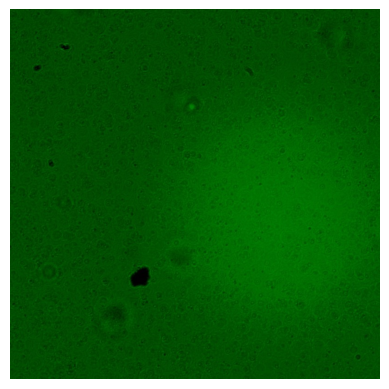

Images Name : **im4.png, --> Shape  (800, 800, 3)
image size: 112,561 bytes


In [39]:
root_pth = '/media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/GLY40P100-1-fold10/1987'
root_pth
ims = sorted(glob.glob(f"{root_pth}/*.png"))
for im in ims:
    #print(im)
    name_im = im.split('/')[-1]
    #print(name_im)
    image = cv2.imread(im)
    sZ = os.path.getsize(im)
    print(f"Images Name : **{name_im}, --> Shape ", image.shape)
    print(f"image size: {sZ:,} bytes")
    plt.axis("off")
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.show()

--------------------

# 👻Create text files for train = 9-fold , for test 1-fold

In [43]:
path_seq_ = list()
for j in range(len(text_demo_)):
    with open(text_demo_[j], 'r') as txt:
         sequence_list = [line.strip() for line in txt]
    flod_Name = text_demo_[j].split('/')
    flod_Name = flod_Name[5:7]
    flod_Name = ('-'.join(flod_Name))
    #for seq in sequence_list:
    for i in range(len(sequence_list)):
        path_seq = flod_Name+"-fold"+str(j+1)+"/"+str(i+1)
        path_seq_.append(path_seq)
        print(path_seq)

GLY10P100-2-fold1/1
GLY10P100-2-fold1/2
GLY10P100-2-fold1/3
GLY10P100-2-fold1/4
GLY10P100-2-fold1/5
GLY10P100-2-fold1/6
GLY10P100-2-fold1/7
GLY10P100-2-fold1/8
GLY10P100-2-fold1/9
GLY10P100-2-fold1/10
GLY10P100-2-fold1/11
GLY10P100-2-fold1/12
GLY10P100-2-fold1/13
GLY10P100-2-fold1/14
GLY10P100-2-fold1/15
GLY10P100-2-fold1/16
GLY10P100-2-fold1/17
GLY10P100-2-fold1/18
GLY10P100-2-fold1/19
GLY10P100-2-fold1/20
GLY10P100-2-fold1/21
GLY10P100-2-fold1/22
GLY10P100-2-fold1/23
GLY10P100-2-fold1/24
GLY10P100-2-fold1/25
GLY10P100-2-fold1/26
GLY10P100-2-fold1/27
GLY10P100-2-fold1/28
GLY10P100-2-fold1/29
GLY10P100-2-fold1/30
GLY10P100-2-fold1/31
GLY10P100-2-fold1/32
GLY10P100-2-fold1/33
GLY10P100-2-fold1/34
GLY10P100-2-fold1/35
GLY10P100-2-fold1/36
GLY10P100-2-fold1/37
GLY10P100-2-fold1/38
GLY10P100-2-fold1/39
GLY10P100-2-fold1/40
GLY10P100-2-fold1/41
GLY10P100-2-fold1/42
GLY10P100-2-fold1/43
GLY10P100-2-fold1/44
GLY10P100-2-fold1/45
GLY10P100-2-fold1/46
GLY10P100-2-fold1/47
GLY10P100-2-fold1/48
G

In [44]:
print(len(path_seq_))
path_seq_

19978


['GLY10P100-2-fold1/1',
 'GLY10P100-2-fold1/2',
 'GLY10P100-2-fold1/3',
 'GLY10P100-2-fold1/4',
 'GLY10P100-2-fold1/5',
 'GLY10P100-2-fold1/6',
 'GLY10P100-2-fold1/7',
 'GLY10P100-2-fold1/8',
 'GLY10P100-2-fold1/9',
 'GLY10P100-2-fold1/10',
 'GLY10P100-2-fold1/11',
 'GLY10P100-2-fold1/12',
 'GLY10P100-2-fold1/13',
 'GLY10P100-2-fold1/14',
 'GLY10P100-2-fold1/15',
 'GLY10P100-2-fold1/16',
 'GLY10P100-2-fold1/17',
 'GLY10P100-2-fold1/18',
 'GLY10P100-2-fold1/19',
 'GLY10P100-2-fold1/20',
 'GLY10P100-2-fold1/21',
 'GLY10P100-2-fold1/22',
 'GLY10P100-2-fold1/23',
 'GLY10P100-2-fold1/24',
 'GLY10P100-2-fold1/25',
 'GLY10P100-2-fold1/26',
 'GLY10P100-2-fold1/27',
 'GLY10P100-2-fold1/28',
 'GLY10P100-2-fold1/29',
 'GLY10P100-2-fold1/30',
 'GLY10P100-2-fold1/31',
 'GLY10P100-2-fold1/32',
 'GLY10P100-2-fold1/33',
 'GLY10P100-2-fold1/34',
 'GLY10P100-2-fold1/35',
 'GLY10P100-2-fold1/36',
 'GLY10P100-2-fold1/37',
 'GLY10P100-2-fold1/38',
 'GLY10P100-2-fold1/39',
 'GLY10P100-2-fold1/40',
 'GLY10P1

In [53]:
dir_save = '/media/SSD/rheology_ForFLAVR/'
dir_list = os.listdir(new_dir)
#print(len(dir_list))
dir_list.sort()
dir_list
for i in range(len(dir_list)) :
    seq_tri = [x for x in path_seq_ if not dir_list[i] in x]
    #print(seq_tri)
    with open(f'{dir_save}tri_trainlist_Nf{i+1}.txt', 'w') as f:
             for line in seq_tri:
                 f.write(f"{line}\n")
    print(f'On Process : Write text file name -> [ {dir_save}tri_trainlist_Nf{i+1}.txt ] ')   

On Process : Write text file name -> [ /media/SSD/rheology_ForFLAVR/tri_trainlist_Nf1.txt ] 
On Process : Write text file name -> [ /media/SSD/rheology_ForFLAVR/tri_trainlist_Nf2.txt ] 
On Process : Write text file name -> [ /media/SSD/rheology_ForFLAVR/tri_trainlist_Nf3.txt ] 
On Process : Write text file name -> [ /media/SSD/rheology_ForFLAVR/tri_trainlist_Nf4.txt ] 
On Process : Write text file name -> [ /media/SSD/rheology_ForFLAVR/tri_trainlist_Nf5.txt ] 
On Process : Write text file name -> [ /media/SSD/rheology_ForFLAVR/tri_trainlist_Nf6.txt ] 
On Process : Write text file name -> [ /media/SSD/rheology_ForFLAVR/tri_trainlist_Nf7.txt ] 
On Process : Write text file name -> [ /media/SSD/rheology_ForFLAVR/tri_trainlist_Nf8.txt ] 
On Process : Write text file name -> [ /media/SSD/rheology_ForFLAVR/tri_trainlist_Nf9.txt ] 
On Process : Write text file name -> [ /media/SSD/rheology_ForFLAVR/tri_trainlist_Nf10.txt ] 


In [54]:
# print(len(seq_tri))
# seq_tri

In [57]:
print(len(path_seq_)-len(seq_tri))

1996


## Chek text files

In [59]:
dir_save

'/media/SSD/rheology_ForFLAVR/'

In [60]:
import glob

tri_file = glob.glob(f"{dir_save}tri_trainlist_Nf*.txt")
print(len(tri_file))
tri_file.sort()
tri_file

10


['/media/SSD/rheology_ForFLAVR/tri_trainlist_Nf1.txt',
 '/media/SSD/rheology_ForFLAVR/tri_trainlist_Nf10.txt',
 '/media/SSD/rheology_ForFLAVR/tri_trainlist_Nf2.txt',
 '/media/SSD/rheology_ForFLAVR/tri_trainlist_Nf3.txt',
 '/media/SSD/rheology_ForFLAVR/tri_trainlist_Nf4.txt',
 '/media/SSD/rheology_ForFLAVR/tri_trainlist_Nf5.txt',
 '/media/SSD/rheology_ForFLAVR/tri_trainlist_Nf6.txt',
 '/media/SSD/rheology_ForFLAVR/tri_trainlist_Nf7.txt',
 '/media/SSD/rheology_ForFLAVR/tri_trainlist_Nf8.txt',
 '/media/SSD/rheology_ForFLAVR/tri_trainlist_Nf9.txt']

In [61]:
sequence_list_ = []
for i in range(len(tri_file)):
    #print(test_demo_[i])
    with open(tri_file[i], 'r') as txt:
        sequence_list = [line.strip() for line in txt]
    #print(len(sequence_list))
    sequence_list_.append(len(sequence_list))
print(len(sequence_list_))
sequence_list_

10


[17980, 17982, 17980, 17980, 17980, 17980, 17980, 17980, 17980, 17980]

In [67]:
#print(f'Avg. train Set : {sum(sequence_list_)}')
print(f'Avg. train Set : {sum(sequence_list_)-sequence_list_[0]}')
print(f'Avg. test Set : {sequence_list_[0]}')

Avg. train Set : 161822
Avg. test Set : 17980


In [68]:
tri_file[3]

'/media/SSD/rheology_ForFLAVR/tri_trainlist_Nf3.txt'

In [69]:
with open(tri_file[3], 'r') as txt:
        sequence_list = [line.strip() for line in txt]
sequence_list

['GLY10P100-2-fold1/1',
 'GLY10P100-2-fold1/2',
 'GLY10P100-2-fold1/3',
 'GLY10P100-2-fold1/4',
 'GLY10P100-2-fold1/5',
 'GLY10P100-2-fold1/6',
 'GLY10P100-2-fold1/7',
 'GLY10P100-2-fold1/8',
 'GLY10P100-2-fold1/9',
 'GLY10P100-2-fold1/10',
 'GLY10P100-2-fold1/11',
 'GLY10P100-2-fold1/12',
 'GLY10P100-2-fold1/13',
 'GLY10P100-2-fold1/14',
 'GLY10P100-2-fold1/15',
 'GLY10P100-2-fold1/16',
 'GLY10P100-2-fold1/17',
 'GLY10P100-2-fold1/18',
 'GLY10P100-2-fold1/19',
 'GLY10P100-2-fold1/20',
 'GLY10P100-2-fold1/21',
 'GLY10P100-2-fold1/22',
 'GLY10P100-2-fold1/23',
 'GLY10P100-2-fold1/24',
 'GLY10P100-2-fold1/25',
 'GLY10P100-2-fold1/26',
 'GLY10P100-2-fold1/27',
 'GLY10P100-2-fold1/28',
 'GLY10P100-2-fold1/29',
 'GLY10P100-2-fold1/30',
 'GLY10P100-2-fold1/31',
 'GLY10P100-2-fold1/32',
 'GLY10P100-2-fold1/33',
 'GLY10P100-2-fold1/34',
 'GLY10P100-2-fold1/35',
 'GLY10P100-2-fold1/36',
 'GLY10P100-2-fold1/37',
 'GLY10P100-2-fold1/38',
 'GLY10P100-2-fold1/39',
 'GLY10P100-2-fold1/40',
 'GLY10P1

In [70]:
sequence_list[-1]

'GLY40P100-1-fold10/1996'

In [85]:
sequence_list[3995]

'GLY10P100-4-fold2/1998'

In [83]:
sequence_list[3996]

'GLY10P100-6-fold4/1'

------------

# 👻Create text files for test 

```testlist_f{}.txt```

In [150]:
dir_save = '/media/SSD/rheology_ForFLAVR/Glycerol-water-mixtures-train/'
dir_list = os.listdir(new_dir)
#print(len(dir_list))
dir_list.sort()
#dir_list
dir_sub_ = []
for i in range(len(dir_list)):
    dir_sub = sorted(glob.glob(f"{dir_save}{dir_list[i]}/*"))
    dir_sub.sort()
    print(len(dir_sub))
    dir_sub_.append(dir_sub)
    print('-'*80)
    
for j in range(len(dir_sub_)):
    test_dir = []
    dir_sub = dir_sub_[j]
    #print(dir_sub)
    for d in dir_sub:
        #print(d)
        d_ = d.split('/')[5:7]
        d1_ = '/'.join(d_)
        test_dir.append(d1_)
    with open(f'/media/SSD/rheology_ForFLAVR/testlist_f{j+1}.txt', 'w') as f:
             for line in test_dir:
                 f.write(f"{line}\n")
    print(f'On Process : Write text file name -> [ /media/SSD/rheology_ForFLAVR/testlist_f{j+1}.txt ] ')   

1998
--------------------------------------------------------------------------------
1998
--------------------------------------------------------------------------------
1998
--------------------------------------------------------------------------------
1998
--------------------------------------------------------------------------------
1998
--------------------------------------------------------------------------------
1998
--------------------------------------------------------------------------------
1998
--------------------------------------------------------------------------------
1998
--------------------------------------------------------------------------------
1998
--------------------------------------------------------------------------------
1996
--------------------------------------------------------------------------------
On Process : Write text file name -> [ /media/SSD/rheology_ForFLAVR/testlist_f1.txt ] 
On Process : Write text file name -> [ /media/SSD/rhe

## Check Test file (10-fold)

In [154]:
import glob

test_file = glob.glob("/media/SSD/rheology_ForFLAVR/testlist_f*.txt")
print(len(test_file))
test_file.sort()
test_file

10


['/media/SSD/rheology_ForFLAVR/testlist_f1.txt',
 '/media/SSD/rheology_ForFLAVR/testlist_f10.txt',
 '/media/SSD/rheology_ForFLAVR/testlist_f2.txt',
 '/media/SSD/rheology_ForFLAVR/testlist_f3.txt',
 '/media/SSD/rheology_ForFLAVR/testlist_f4.txt',
 '/media/SSD/rheology_ForFLAVR/testlist_f5.txt',
 '/media/SSD/rheology_ForFLAVR/testlist_f6.txt',
 '/media/SSD/rheology_ForFLAVR/testlist_f7.txt',
 '/media/SSD/rheology_ForFLAVR/testlist_f8.txt',
 '/media/SSD/rheology_ForFLAVR/testlist_f9.txt']

In [155]:
f = open(test_file[5], "r")
print(f.read())

GLY10P100-7-fold5/1
GLY10P100-7-fold5/10
GLY10P100-7-fold5/100
GLY10P100-7-fold5/1000
GLY10P100-7-fold5/1001
GLY10P100-7-fold5/1002
GLY10P100-7-fold5/1003
GLY10P100-7-fold5/1004
GLY10P100-7-fold5/1005
GLY10P100-7-fold5/1006
GLY10P100-7-fold5/1007
GLY10P100-7-fold5/1008
GLY10P100-7-fold5/1009
GLY10P100-7-fold5/101
GLY10P100-7-fold5/1010
GLY10P100-7-fold5/1011
GLY10P100-7-fold5/1012
GLY10P100-7-fold5/1013
GLY10P100-7-fold5/1014
GLY10P100-7-fold5/1015
GLY10P100-7-fold5/1016
GLY10P100-7-fold5/1017
GLY10P100-7-fold5/1018
GLY10P100-7-fold5/1019
GLY10P100-7-fold5/102
GLY10P100-7-fold5/1020
GLY10P100-7-fold5/1021
GLY10P100-7-fold5/1022
GLY10P100-7-fold5/1023
GLY10P100-7-fold5/1024
GLY10P100-7-fold5/1025
GLY10P100-7-fold5/1026
GLY10P100-7-fold5/1027
GLY10P100-7-fold5/1028
GLY10P100-7-fold5/1029
GLY10P100-7-fold5/103
GLY10P100-7-fold5/1030
GLY10P100-7-fold5/1031
GLY10P100-7-fold5/1032
GLY10P100-7-fold5/1033
GLY10P100-7-fold5/1034
GLY10P100-7-fold5/1035
GLY10P100-7-fold5/1036
GLY10P100-7-fold5/10